<div align="center">
    <img src='../images/hw2.png' alt='hw1-log'/>
</div>

## Import Libraries

In [129]:
# Scientific
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

## Download Dataset

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-26 16:54:08--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M   783KB/s    in 1.8s    

2023-09-26 16:54:10 (783 KB/s) - ‘housing.csv’ saved [1423529/1423529]



## Load Dataset

In [130]:
data = pd.read_csv('../dataset/housing.csv')

## EDA
 - Look at the ```median_house_value``` variable. Does it have a long tail?

In [131]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


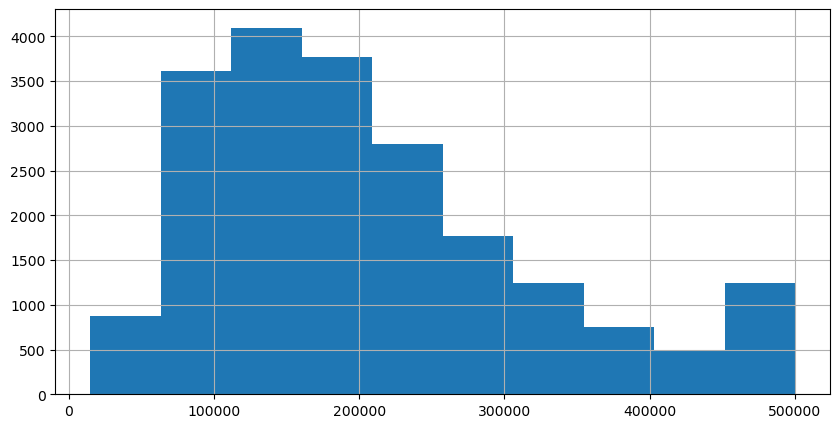

In [132]:
data.median_house_value.hist(figsize=(10,5))
plt.show()

As We can see it has a long tail. so the answer is yes.

## Preparing the dataset
For this homework, we only want to use a subset of data.
First, keep only the records where ```ocean_proximity``` is either ```'<1H OCEAN'``` or ```'INLAND'```

Next, use only the following columns:

- ```'latitude'```,
- ```'longitude'```,
- ```'housing_median_age'```,
- ```'total_rooms'```,
- ```'total_bedrooms'```,
- ```'population'```,
- ```'households'```,
- ```'median_income'```,
- ```'median_house_value'```

In [133]:
filtered_data = data[(data['ocean_proximity'] == '<1H OCEAN') | (data['ocean_proximity'] == 'INLAND')]

In [134]:
columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
           'population', 'households', 'median_income', 'median_house_value']

In [135]:
filtered_data = filtered_data[columns]
filtered_data

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1: There's one feature with missing values. What is it?

In [136]:
for column in filtered_data.columns:
    if data[column].isna().any() == True:
        print(column)

total_bedrooms


In [137]:
filtered_data.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [138]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## Question 2: What's the median (50% percentile) for variable ```'population'```?

In [139]:
median_population = filtered_data['population'].median()
print("Median population:", median_population)

Median population: 1195.0


In [140]:
median_population = filtered_data.population.describe()[5]
print("Median population:", median_population)

Median population: 1195.0


## Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [141]:
n = filtered_data.shape[0]

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [142]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [143]:
data_train = filtered_data.iloc[idx[:n_train]]
data_val = filtered_data.iloc[idx[n_train:n_train+n_val]]
data_test = filtered_data.iloc[idx[n_train+n_val:]]

data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [144]:
y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

In [145]:
data_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [146]:
del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']

In [147]:
data_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

## Question 3: Follow the below steps:
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [148]:
def fill_missing_values(dataframe, method):
    df = dataframe.copy()
    
    if method == 0:
        df.total_bedrooms.fillna(value=0, inplace = True)
        return df.values
        
    elif method == 'mean':
        mean_value = data.total_bedrooms.mean()
        df.total_bedrooms.fillna(value=mean_value, inplace = True)
        return df.values
    else:
        print('Invalid method!')

In [149]:
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [150]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [153]:
X_train = fill_missing_values(data_train, 'mean')
w_0, w = linear_regression(X_train, y_train)

X_val = fill_missing_values(data_val, 'mean')
y_val_pred = w_0 + X_val.dot(w)
rmse_score = round(rmse(y_val_pred, y_val), 2)
rmse_score

0.34

In [154]:
X_train = fill_missing_values(data_train, 0)
w_0, w = linear_regression(X_train, y_train)

X_val = fill_missing_values(data_val, 0)
y_val_pred = w_0 + X_val.dot(w)
rmse_score = round(rmse(y_val_pred, y_val), 2)
rmse_score

0.34

As we can see Both are equally good

## Question 4: Follow the below steps:
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

In [157]:
def linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [158]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r in r_values:
    X_train = fill_missing_values(data_train, 0)
    w_0, w = linear_regression_reg(X_train, y_train, r=r)
    
    X_val = fill_missing_values(data_val, 0)
    y_val_pred = w_0 + X_val.dot(w)
    rmse_score = round(rmse(y_val_pred, y_val), 2)
    
    print(f'r: {r}, RMSE: {rmse_score}')

r: 0, RMSE: 0.34
r: 1e-06, RMSE: 0.34
r: 0.0001, RMSE: 0.34
r: 0.001, RMSE: 0.34
r: 0.01, RMSE: 0.34
r: 0.1, RMSE: 0.34
r: 1, RMSE: 0.34
r: 5, RMSE: 0.35
r: 10, RMSE: 0.35


The smallest r which gives the best RMSE is : 0.000001

## Question 5: Follow the bellow steps
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [174]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seed_values:
    n = filtered_data.shape[0]

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    data_train = filtered_data.iloc[idx[:n_train]]
    data_val = filtered_data.iloc[idx[n_train:n_train+n_val]]
    data_test = filtered_data.iloc[idx[n_train+n_val:]]

    data_train = data_train.reset_index(drop=True)
    data_val = data_val.reset_index(drop=True)
    data_test = data_test.reset_index(drop=True)
    
    y_train = np.log1p(data_train.median_house_value.values)
    y_val = np.log1p(data_val.median_house_value.values)
    y_test = np.log1p(data_test.median_house_value.values)
    
    del data_train['median_house_value']
    del data_val['median_house_value']
    del data_test['median_house_value']
    
    X_train = fill_missing_values(data_train, 0)
    w_0, w = linear_regression_reg(X_train, y_train, r=0)

    X_val = fill_missing_values(data_val, 0)
    y_val_pred = w_0 + X_val.dot(w)
    rmse_score = round(rmse(y_val_pred, y_val), 2)
    
    print(f'seed: {seed}, RMSE: {rmse_score}')
    
    rmse_scores.append(rmse_score)


seed: 0, RMSE: 0.34
seed: 1, RMSE: 0.34
seed: 2, RMSE: 0.34
seed: 3, RMSE: 0.33
seed: 4, RMSE: 0.34
seed: 5, RMSE: 0.34
seed: 6, RMSE: 0.34
seed: 7, RMSE: 0.35
seed: 8, RMSE: 0.35
seed: 9, RMSE: 0.33


In [175]:
std_deviation = round(np.std(np.array(rmse_scores)), 3)
print('standard deviation is: ', std_deviation)

standard deviation is:  0.006


## Question 6: Flollow the bellow steps:
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with ```r=0.001```.
- What's the RMSE on the test dataset?


In [169]:
n = filtered_data.shape[0]

idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

data_train = filtered_data.iloc[idx[:n_train]]
data_val = filtered_data.iloc[idx[n_train:n_train+n_val]]
data_test = filtered_data.iloc[idx[n_train+n_val:]]

data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']

In [173]:
concatenated_data = pd.concat([data_train, data_val])
concatenated_y = np.concatenate((y_train, y_val), axis=0)

In [183]:
 X_train = fill_missing_values(concatenated_data, 0)
w_0, w = linear_regression_reg(X_train, concatenated_y, r=0.001)

X_test = fill_missing_values(data_test, 0)
y_test_pred = w_0 + X_test.dot(w)
rmse_score = round(rmse(y_test_pred, y_test), 2)

print(f'RMSE: {rmse_score}')

RMSE: 0.33
